# Introduction to Regression with Neural Networks in tensorflow
There are many defintions for a regression problem but in our case, we're going to simplify it: predicting a numberical variable based on some other combination of variables, even shorter.... predicting a number

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


## creating data to view and fit

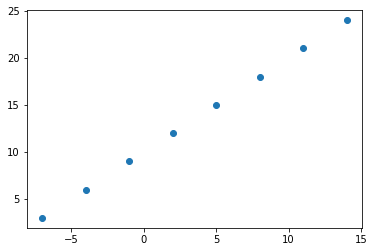

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

# create labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# visualize it
plt.scatter(X,y);

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes

In [ ]:
X.shape, y.shape

((8,), (8,))

In [ ]:
X[1].shape

()

In [ ]:
X[1].ndim

0

In [ ]:
# turn our numpy arrays into tensors 
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X[0].shape

TensorShape([])

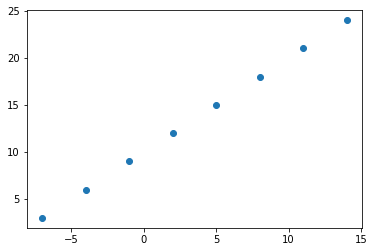

In [ ]:
plt.scatter(X,y)

In [ ]:
tf.cast(X,dtype = tf.float32)
tf.cast(y,dtype = tf.float32)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

## steps in modelling with tensorflow
1. creating a model 
2. compiling a model
3. fitting a model

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model using sequentail api
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # to add a new axis

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 312ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## improving model
we can improve the model, by altering the steps we took to create a model
1. creating a model
2. compiling a model
3. fitting the model

In [ ]:
# let's rebuild our model

# create a model 
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
])

# compile the model 
model.compile(
     loss = tf.keras.losses.mae,
     optimizer = tf.keras.optimizers.SGD(),
     metrics = ["mae"])

# fit the model(but we are going to train longer)
model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100) # increasing the epochs

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 50ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 164ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# rebuilding another time but changing the optimizers

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr = 0.1) # lr meanis learning rate 
)

# fit the model
model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 511ms/step - loss: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7706
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9023
Epoch 13/100
1/1 [==============================]

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 148ms/step


array([[27.497076]], dtype=float32)

## commom ways to improve a deep model:
1. adding layers
2. increase the number of hidden units
3. change the activation functions
4. change the optimization function
5. change the learning rate 
6. fitting on more data

In [ ]:
X = tf.expand_dims(X,axis = -1)
X

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [ ]:
# improving the model a lot better
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = ["mae"],
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.0060 - mae: 13.0060
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 9.8857 - mae: 9.8857
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 6.3097 - mae: 6.3097
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 4.8230 - mae: 4.8230
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 5.8864 - mae: 5.8864
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 5.0058 - mae: 5.0058
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 3.9187 - mae: 3.9187
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 4.6911 - mae: 4.6911
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 4.8066 - mae: 4.8066
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 3.8656 - mae: 3.8656
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - lo

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 271ms/step


array([[26.866999]], dtype=float32)

## evaluting a model 
1. the data - what data are we working with? What does it look like?
2. the model itself - what does our model look like?
3. the training the model - how does a model perform while it learns?
4. the predictions of the module - how do the predictions of a model line up against the ground truth(the original labels)?

In [ ]:
X = tf.range(-100,100,4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
X_train = X[:40]
X_train,len(X_train)

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>, 40)

In [ ]:
y_train = y[:40]
y_train,len(y_train)

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>, 40)

In [ ]:
X_test = X[40:]
X_test, len(X_test)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 10)

In [ ]:
y_test = y[40:]
y_test, len(y_test)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 10)

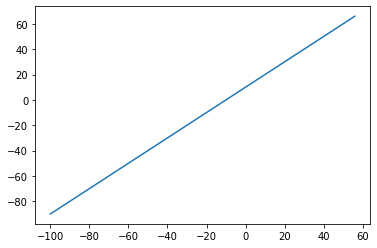

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_train,y_train)

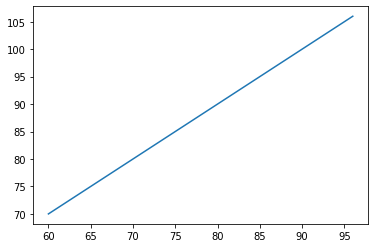

In [ ]:
plt.plot(X_test,y_test)

* each and every time we fit the model the model gets trained for another 100 epochs
* verbose is also another parameter used in fit to show the progress
* no or nuerons or units are the output of the particular layer

In [ ]:
# creating a model with full data set

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

# compile the model
model.compile(loss = ["mae"],
              optimizer = tf.keras.optimizers.Adam(lr = 0.1),
              metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X_train,axis = -1),y_train,epochs = 100) # tf.expanded is not needed when we use input_shape or any other build functions

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 8ms/step - loss: 93.0769 - mae: 93.0769
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 84.3049 - mae: 84.3049
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 75.8354 - mae: 75.8354
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 67.2264 - mae: 67.2264
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 58.7752 - mae: 58.7752
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 50.2874 - mae: 50.2874
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 41.7770 - mae: 41.7770
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 33.0283 - mae: 33.0283
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 24.9732 - mae: 24.9732
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 17.3195 - mae: 17.3195
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss

In [ ]:
X_test = tf.expand_dims(X_test,axis = -1)
X_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[60],
       [64],
       [68],
       [72],
       [76],
       [80],
       [84],
       [88],
       [92],
       [96]], dtype=int32)>

In [ ]:
y_pred = tf.squeeze(tf.constant(model.predict(X_test)))
y_pred

1/1 [==============================] - 0s 65ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.31457 ,  74.333885,  78.3532  ,  82.37252 ,  86.39184 ,
        90.411156,  94.430466,  98.44978 , 102.4691  , 106.48842 ],
      dtype=float32)>

In [ ]:
len(y_pred) == len(y_test)

True

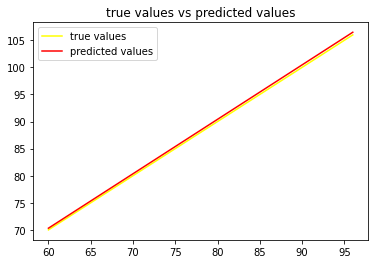

In [ ]:
# plotting the predicted values with the actual values
plt.plot(X_test,y_test,color = "yellow",label = "true values")
plt.plot(X_test,y_pred,color = "red",label = "predicted values")
plt.title("true values vs predicted values")
plt.legend();

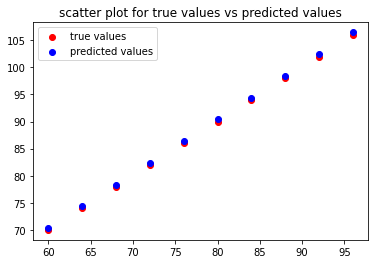

In [ ]:
# plotting with scatter plot
plt.scatter(X_test,y_test,color = "red", label = "true values")
plt.scatter(X_test,y_pred,color = "blue",label = "predicted values")
plt.title("scatter plot for true values vs predicted values")
plt.legend();

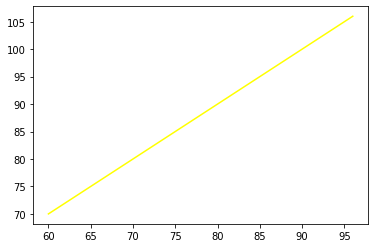

In [ ]:
plt.plot(X_test,y_test,color = "yellow")

### the 3 sets...
1. training set - the model learns from this data
2. validation set - the model gets tuned on this data
3. test set - to test what it has learned

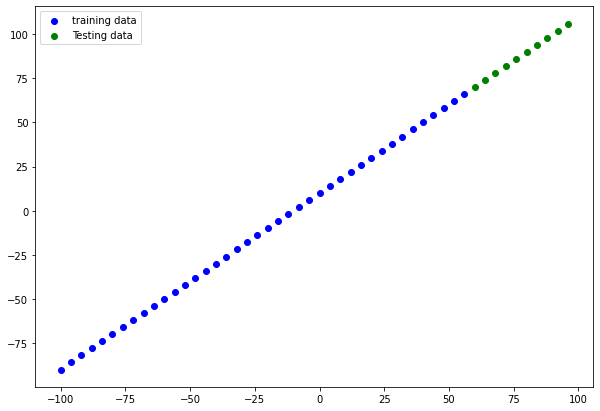

In [ ]:
# plotting
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train,c = "b",label = "training data")
plt.scatter(X_test,y_test,c = "g",label = "Testing data")
plt.legend();

In [ ]:
# evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 317ms/step - loss: 0.4015 - mae: 0.4015


[0.4014938473701477, 0.4014938473701477]

In order to use summary we should build the model with model.build() or specify the input shape in one layer or fit the model to the inputs

In [ ]:
# visualize model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1. total params = total number of parameters in the model
2. trainable params = these are the parameters (patterns) the model can update as it trains
3. non-trainable params = theses parameters arent updated during training (these are the parameters from other model during transfer learning)

### another way to visualize model

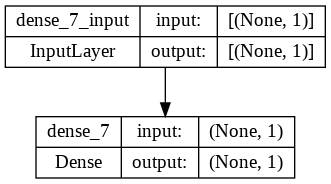

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [ ]:
# to change the layer name
# tf.keras.layers.Dense(10,name = "layername") just add name parameter and change the name

In [ ]:
# creating a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels, c = "b",label = "training data")
  plt.scatter(test_data,test_labels, c = "g", label = "testing data")
  plt.scatter(test_data,y_pred,c = "r",label = "predictions")
  plt.title("plot to compare the values")
  plt.legend();

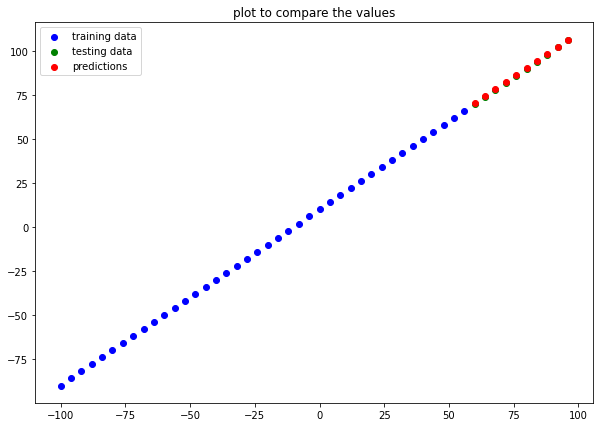

In [ ]:
plot_predictions()

## evaluting our models prediction with regression evaluation metrics
depending the type of the problem there are different metrics.use - a great started metric for any regression problem
1. mae  = mean absolute error, tells how wrong is each of model's predictions. use - when larger errors are significant than smaller errors
2. mse = mean square error, tells the square of average errors. use - combination of mse and mae less sensitive to outlier mse

* mae
  1. tf.keras.losses.MAE()
  2. tf.metrics.mean_absolute_error()
* mse
  1. tf.keras.losses.MSE()
  2. tf.keras.mean_square_error()
* these calculates metrics for each and every element but if you want to find the mean of the metrics we have to use tf.math.reduce_mean() to find the mean of the metrics (or) change the shape both y_true and y_pred must be of the same shape

In [ ]:
# evaluate the model on the test (ie) this method executes the metric used in the model
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 33ms/step - loss: 0.4015 - mae: 0.4015


[0.4014938473701477, 0.4014938473701477]

In [ ]:
# calculate the mae
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.40149385>

In [ ]:
# another way to create the mae
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.40149385>

In [ ]:
# calculat the mse
tf.metrics.mean_squared_error(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.1642756>

In [ ]:
# another way to create the mse
tf.keras.losses.MSE(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.1642756>

In [ ]:
# to access the numpy value
tf.keras.losses.MSE(y_test,y_pred).numpy()

0.1642756

 ### Running experiments to improve our model
 1. get more data
 2. make your model larger(using a more complex model)
 3. train for longer

### Tracking your experiments
comparing your models 

1. tensorboard
2. weights and bias

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model2.compile(loss = ["mae"],
              optimizer = tf.keras.optimizers.Adam(lr = 0.1),
              metrics = ["mae"])
model2.fit(tf.expand_dims(X_train,axis = -1),y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 9ms/step - loss: 83.8568 - mae: 83.8568
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 75.0848 - mae: 75.0848
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 66.6154 - mae: 66.6154
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 58.0063 - mae: 58.0063
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 49.5955 - mae: 49.5955
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 41.1585 - mae: 41.1585
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 32.6962 - mae: 32.6962
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 24.1026 - mae: 24.1026
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 16.3520 - mae: 16.3520
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7564 - mae: 9.7564
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

In [ ]:
y_pred2 = tf.squeeze(model2.predict(X_test))
y_pred2.shape

1/1 [==============================] - 0s 43ms/step


TensorShape([10])

In [ ]:
tf.metrics.mean_absolute_error(y_test,y_pred2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8776291>

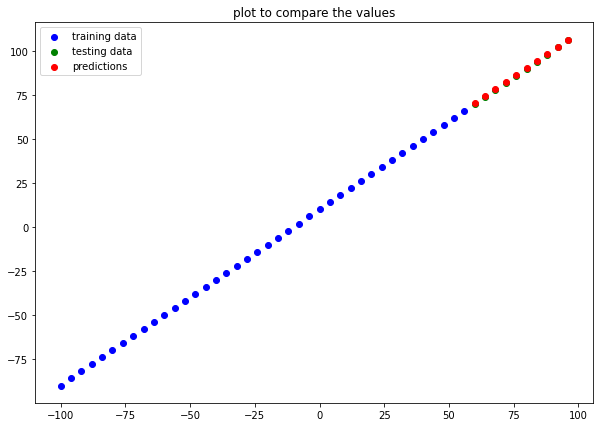

In [ ]:
plot_predictions(predictions = y_pred2)

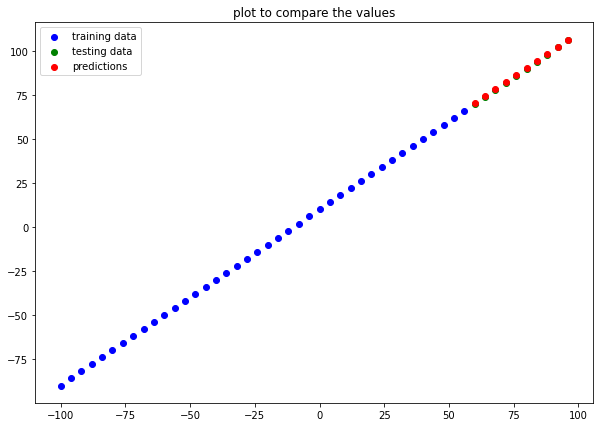

In [ ]:
plot_predictions()

In [ ]:
model2.predict([70,80,90])

1/1 [==============================] - 0s 58ms/step


array([[ 80.782455],
       [ 90.90143 ],
       [101.020386]], dtype=float32)

## saving model
saving model is to save the weights or patterns and the optimization for later purposes like using on a different project.

There are 2 to save a model
1. normal savemodel format(commonly used format, used when we prefer to stay in colab)
2. hdf5 format(which is used when we should use the model elsewhere) - use .h5 extension at the end of the file name for this

In [ ]:
# normal saved format
# model2.save("predicting(x+10)no")

In [ ]:
# hdf5 save model
# model2.save("predicting(X+10)no.h5")

### loading a model
when loading a saved model we can access the patterns that the model has leared from its previous save

In [ ]:
# to load a normal saved format model
normal_saved_model = tf.keras.models.load_model("predicting(x+10)no")
normal_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


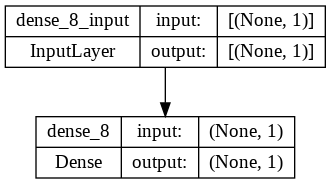

In [ ]:
plot_model(normal_saved_model, show_shapes= True)

In [ ]:
normal_saved_model_preds = normal_saved_model.predict(X_test)
normal_saved_model_preds

1/1 [==============================] - 0s 74ms/step


array([[ 70.6635  ],
       [ 74.71109 ],
       [ 78.75867 ],
       [ 82.80626 ],
       [ 86.853836],
       [ 90.90143 ],
       [ 94.949005],
       [ 98.99658 ],
       [103.044174],
       [107.09175 ]], dtype=float32)

In [ ]:
# to check if loaded model and model2 produce the same result
tf.squeeze(normal_saved_model_preds) == tf.squeeze(model2.predict(X_test))

1/1 [==============================] - 0s 21ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
# loading a hdf5 format model
load_hdf5_model = tf.keras.models.load_model("predicting(X+10)no.h5")
load_hdf5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


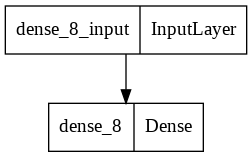

In [ ]:
plot_model(load_hdf5_model)

In [ ]:
# to check whether the loaded model and the model2 produce the same result
tf.squeeze(load_hdf5_model.predict(X_test)) == tf.squeeze(model2.predict(X_test))

1/1 [==============================] - 0s 149ms/step


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

## saved and download files 

In [ ]:
# download file from google colab
# from google.colab import files
# files.download("filepath")

In [ ]:
# save a file from google colab to google drive
# !cp locationofthefile distinction

In [ ]:
# lists the directories and files in the current  location
# !ls location